# Random Forest Regressor Model

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error

## Loading the data

In [2]:
#To remove
df1 = pd.read_csv("DatasetCleanFinal.csv", sep=",")

In [3]:
#df1 = pd.read_csv("../../data/DatasetCleanFinal.csv", sep=",")

In [4]:
df1.head()

,ActualLandingTime,Airline,AircraftType,RunwayNumber,StandNumber,Date,AWNDmean,PRCPmean,TAVGmean,WDF5mean,...,IceRoad,WetDay,ShipmentWeightCat,NbPlanesLast10Mn,Hour,WeekDay,ParkingArea,StandRank,TaxiTime,LogTaxiTime
0,2018-07-30 04:25:00,CAR1,B737/9-WL,2.0,4,2018-07-30 00:00:00,4.173333,0.006667,79.0,153.333333,...,0.0,1.0,M,0.0,4,0,16223.1,1,4.0,1.609438
1,2018-07-30 08:14:00,CAR1,B757/2-WL,2.0,7,2018-07-30 00:00:00,4.173333,0.006667,79.0,153.333333,...,0.0,1.0,M,0.0,8,0,20919.9,1,4.0,1.609438
2,2018-07-30 08:26:00,CAR1,A321/2,1.0,8,2018-07-30 00:00:00,4.173333,0.006667,79.0,153.333333,...,0.0,1.0,M,0.0,8,0,16337.8,1,3.0,1.386294
3,2018-07-30 08:42:00,CAR1,B737/9-WL,2.0,9,2018-07-30 00:00:00,4.173333,0.006667,79.0,153.333333,...,0.0,1.0,M,0.0,8,0,16223.1,1,4.0,1.609438
4,2018-07-30 08:52:00,CAR1,A321/2,2.0,11,2018-07-30 00:00:00,4.173333,0.006667,79.0,153.333333,...,0.0,1.0,M,0.0,8,0,16337.8,1,5.0,1.791759


We drop the AircraftType. We already put this information in the parking area column.

In [5]:
df1.drop(['AircraftType'], axis=1, inplace=True)

We drop useless columns

In [6]:
df1.drop(['ActualLandingTime', 'Date', 'StandNumber'], axis=1, inplace=True)

In [7]:
df1.shape

(129018, 22)

## One-Hot Encoding

As the Random Forest Regressor of scikit learn does not support categorical variables, we use One-Hot encoding.

In [8]:
df1.dtypes

Airline               object
RunwayNumber         float64
AWNDmean             float64
PRCPmean             float64
TAVGmean             float64
WDF5mean             float64
WSF2max              float64
WSF5max              float64
WT01max              float64
WT02max              float64
WT03max              float64
WT08max              float64
IceRoad              float64
WetDay               float64
ShipmentWeightCat     object
NbPlanesLast10Mn     float64
Hour                   int64
WeekDay                int64
ParkingArea          float64
StandRank              int64
TaxiTime             float64
LogTaxiTime          float64
dtype: object

In [9]:
df1['RunwayNumber'] = pd.Categorical(df1['RunwayNumber'])
df1['Airline'] = pd.Categorical(df1['Airline'])
df1['ShipmentWeightCat'] = pd.Categorical(df1['ShipmentWeightCat'])

In [10]:
dfDummiesRunwayNumber = pd.get_dummies(df1['RunwayNumber'], prefix = 'RunwayNumber')
dfDummiesAirline = pd.get_dummies(df1['Airline'], prefix = 'Airline')
dfDummiesShipmentWeightCat = pd.get_dummies(df1['ShipmentWeightCat'], prefix = 'ShipmentWeightCat')

In [11]:
df2 = pd.concat([df1, dfDummiesRunwayNumber, dfDummiesAirline, dfDummiesShipmentWeightCat], axis=1)

In [12]:
df2.shape

(129018, 39)

In [13]:
df2.head()

,Airline,RunwayNumber,AWNDmean,PRCPmean,TAVGmean,WDF5mean,WSF2max,WSF5max,WT01max,WT02max,...,RunwayNumber_7.0,RunwayNumber_8.0,RunwayNumber_9.0,Airline_CAR1,Airline_CAR2,Airline_CAR3,Airline_CAR4,ShipmentWeightCat_L,ShipmentWeightCat_M,ShipmentWeightCat_S
0,CAR1,2.0,4.173333,0.006667,79.0,153.333333,15.0,19.0,1.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,CAR1,2.0,4.173333,0.006667,79.0,153.333333,15.0,19.0,1.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,CAR1,1.0,4.173333,0.006667,79.0,153.333333,15.0,19.0,1.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,CAR1,2.0,4.173333,0.006667,79.0,153.333333,15.0,19.0,1.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,CAR1,2.0,4.173333,0.006667,79.0,153.333333,15.0,19.0,1.0,0.0,...,0,0,0,1,0,0,0,0,1,0


## Creat input matrix and target columns

In [14]:
X = df2.drop(['TaxiTime', 'LogTaxiTime', 'RunwayNumber', 'Airline', 'ShipmentWeightCat'], axis=1)
y = df2['LogTaxiTime']

In [15]:
print(X.shape)
print(y.shape)

(129018, 34)
(129018,)


## Generate training & testing sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False,random_state=42)

In [17]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(103214, 34) (103214,)
(25804, 34) (25804,)


## Random Forest Regressor

In [18]:
rf = RandomForestRegressor(bootstrap=False, 
                           max_depth=40, 
                           max_features='sqrt', 
                           min_samples_leaf=2, 
                           min_samples_split=10, 
                           n_estimators=50, 
                           n_jobs =-1)

In [19]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=40,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [20]:
y_pred = np.exp(rf.predict(X_test))-1

In [21]:
y_pred[:10]

array([8.65053814, 6.06272652, 6.49537912, 6.5758651 , 5.33459271,
       5.8619847 , 6.02345017, 6.31116095, 6.20718539, 5.00935967])

#### Compute RMSE score

In [22]:
np.sqrt(mean_squared_error(np.exp(y_test)-1, y_pred))

4.166141407156931

#### Compute accuracy +/- 3 and 5 minutes

In [23]:
accuracy_dataframe = pd.DataFrame(data={'y_pred':y_pred, 'y_test':np.exp(y_test)-1})

In [24]:
accuracy_dataframe['3MinutesRange'] = abs(accuracy_dataframe['y_pred'] - accuracy_dataframe['y_test']) <= 3
accuracy_dataframe['5MinutesRange'] = abs(accuracy_dataframe['y_pred'] - accuracy_dataframe['y_test']) <= 5

In [25]:
print(accuracy_dataframe['3MinutesRange'].value_counts(normalize=True) * 100)

print(accuracy_dataframe['5MinutesRange'].value_counts(normalize=True) * 100)

True     82.165556
False    17.834444
Name: 3MinutesRange, dtype: float64
True     92.671679
False     7.328321
Name: 5MinutesRange, dtype: float64


In [26]:
Error = (np.exp(y_test)-1 - y_pred)**2
print(np.sqrt(Error.quantile(0.1)))
print(np.sqrt(Error.quantile(0.9)))

0.2534019941886494
4.084921316924441


#### Check features importance

In [30]:
from matplotlib import pyplot as plt

In [38]:
np.flip(indices)

array([21, 20, 28,  7, 29, 18, 10,  8, 30, 11, 19,  6,  9, 27, 33, 31, 32,
       22, 14, 23,  4,  5, 17,  2,  0,  1,  3, 16, 15, 12, 25, 26, 24, 13],
      dtype=int64)

In [42]:
features

Index(['AWNDmean', 'PRCPmean', 'TAVGmean', 'WDF5mean', 'WSF2max', 'WSF5max',
       'WT01max', 'WT02max', 'WT03max', 'WT08max', 'IceRoad', 'WetDay',
       'NbPlanesLast10Mn', 'Hour', 'WeekDay', 'ParkingArea', 'StandRank',
       'RunwayNumber_0.0', 'RunwayNumber_1.0', 'RunwayNumber_2.0',
       'RunwayNumber_3.0', 'RunwayNumber_4.0', 'RunwayNumber_5.0',
       'RunwayNumber_6.0', 'RunwayNumber_7.0', 'RunwayNumber_8.0',
       'RunwayNumber_9.0', 'Airline_CAR1', 'Airline_CAR2', 'Airline_CAR3',
       'Airline_CAR4', 'ShipmentWeightCat_L', 'ShipmentWeightCat_M',
       'ShipmentWeightCat_S'],
      dtype='object')

Feature ranking:
14. feature Hour (0.173412)
25. feature RunwayNumber_7.0 (0.125661)
27. feature RunwayNumber_9.0 (0.098352)
26. feature RunwayNumber_8.0 (0.096440)
13. feature NbPlanesLast10Mn (0.086112)
16. feature ParkingArea (0.051428)
17. feature StandRank (0.051412)
4. feature WDF5mean (0.040442)
2. feature PRCPmean (0.031189)
1. feature AWNDmean (0.024318)
3. feature TAVGmean (0.023927)
18. feature RunwayNumber_0.0 (0.023475)
6. feature WSF5max (0.021931)
5. feature WSF2max (0.019540)
24. feature RunwayNumber_6.0 (0.017897)
15. feature WeekDay (0.017358)
23. feature RunwayNumber_5.0 (0.017307)
33. feature ShipmentWeightCat_M (0.010918)
32. feature ShipmentWeightCat_L (0.008774)
34. feature ShipmentWeightCat_S (0.008449)
28. feature Airline_CAR1 (0.007149)
10. feature WT08max (0.005641)
7. feature WT01max (0.005077)
20. feature RunwayNumber_2.0 (0.004974)
12. feature WetDay (0.004773)
31. feature Airline_CAR4 (0.004452)
9. feature WT03max (0.004207)
11. feature IceRoad (0.003813)

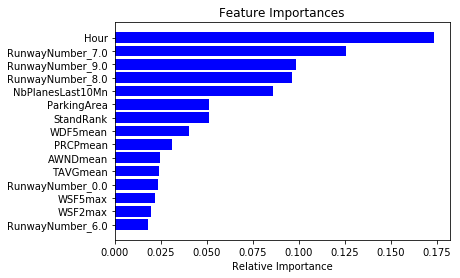

In [40]:
features = X.columns
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in indices:
    print("%d. feature %s (%f)" % (f + 1, X.columns[f], importances[f]))

# Plot the feature importances of the forest
indices = indices[0:15]
indices = np.flip(indices)

plt.title('Feature Importances')
plt.barh(range(15), [importances[i] for i in indices], color='b', align='center')
plt.yticks(range(15), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
list(features[indices])

## Grid Search

/!\ We need to be carefull with the cross validation since we are dealing with time series!

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [50]#[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

/!\ Warning: takes a lot of time to execute

In [ ]:
## Use the random grid to search for best hyperparameters
## First create the base model to tune
#rf = RandomForestRegressor()
## Random search of parameters, using 3 fold cross validation, 
## search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = tscv, verbose=10, random_state=42, n_jobs = -1)
## Fit the random search model
#rf_random.fit(X_train, y_train)

In [41]:
rf_random.best_params_

NameError: name 'rf_random' is not defined

## Final RF model

Now that we know the optimal set of hyperparameters, we can build our final model and train it on the entire dataset

In [ ]:
rf_final = RandomForestRegressor(bootstrap=False, 
                           max_depth=40, 
                           max_features='sqrt', 
                           min_samples_leaf=2, 
                           min_samples_split=10, 
                           n_estimators=50, 
                           n_jobs =-1)
rf_final.fit(X, y) #on full dataset

## Pickle the final model for future use

In [ ]:
import pickle
# save the model to disk
filename = 'finalized_random_forest_model.sav'
pickle.dump(rf_final, open(filename, 'wb'))